In [38]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly as plot
import dtale
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [39]:
#Read in the csv file and convert to a Pandas dataframe
# add it into dict to save history of each step
dfs: dict[str: pd.DataFrame] = {"raw":pd.read_csv("../data/RiyadhVillasAqar.csv", low_memory=False)}

# here we set out init df
df: pd.DataFrame = dfs["raw"].copy()

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [40]:
df.head(2)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


In [41]:
d = dtale.show(df, host="localhost")

In [42]:
d.open_browser()

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [155]:
# Private Datasource

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [43]:
df.drop("Unnamed: 0", axis=1, inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [44]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [45]:
#Display number missing values per column
df.isna().sum()

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

In [46]:
df.head(2)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5+,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5+,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


In [47]:
df["lounges"].fillna(0, inplace=True)

In [48]:
df.isna().sum()

front              0
rooms              0
lounges            0
bathrooms          0
streetWidth      190
stairs             0
propertyAge        0
driverRoom         0
tent               0
patio              0
kitchen            0
outdoorRoom        0
garage             0
duplex             0
space              0
apartments         0
maidRoom           0
elevator           0
furnihsed          0
pool               0
basement           0
neighbourhood      0
location           0
price              2
square price       2
dtype: int64

In [49]:
df = df.drop(index=df[df["price"].isna()].index, axis=0)

In [50]:
df.isna().sum()

front              0
rooms              0
lounges            0
bathrooms          0
streetWidth      190
stairs             0
propertyAge        0
driverRoom         0
tent               0
patio              0
kitchen            0
outdoorRoom        0
garage             0
duplex             0
space              0
apartments         0
maidRoom           0
elevator           0
furnihsed          0
pool               0
basement           0
neighbourhood      0
location           0
price              0
square price       0
dtype: int64

In [51]:
df.dropna(axis=0, inplace=True)

In [52]:
df.isna().sum()

front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            0
square price     0
dtype: int64

In [53]:
d.kill()

2024-05-17 16:43:36,919 - INFO     - Executing shutdown...
2024-05-17 16:43:36,921 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [85]:
df["streetWidth"].value_counts().sort_index()

streetWidth
1.0         21
2.0          3
4.0          5
5.0        490
6.0          4
8.0          8
9.0          9
10.0       589
11.0        32
12.0       680
13.0        79
14.0       378
15.0     15392
16.0      1122
17.0       588
18.0      2956
19.0       579
20.0     19160
21.0       908
22.0       216
23.0        91
24.0       107
25.0      1948
26.0        86
27.0        31
28.0       222
29.0        29
30.0       634
31.0        36
32.0        14
33.0         6
34.0         5
35.0        57
36.0        34
37.0         2
38.0         3
39.0         5
40.0        51
41.0         4
42.0         1
43.0         5
44.0         2
45.0         8
50.0         5
51.0         1
56.0         2
60.0        10
61.0         1
62.0         1
64.0         1
70.0         1
72.0         2
96.0         2
97.0         1
100.0        7
Name: count, dtype: int64

In [80]:
d = dtale.show(df, host="localhost")

In [81]:
d.open_browser()

In [56]:
# d.kill()

2024-05-17 16:43:43,739 - INFO     - Executing shutdown...
2024-05-17 16:43:43,741 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [57]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [58]:
# check columns types 

In [59]:
df.head(2)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5+,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5+,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


In [60]:
df.dtypes

front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [61]:
df["lounges"] = df["lounges"].map(lambda x: int(str(x).replace("+", "")))

In [62]:
display(df.head(2))
display(df.dtypes)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5+,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5+,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


front             object
rooms              int64
lounges            int64
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [63]:
df["bathrooms"] = df["bathrooms"].map(lambda x: int(str(x).replace("+", "")))

In [64]:
display(df.head(2))
display(df.dtypes)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


front             object
rooms              int64
lounges            int64
bathrooms          int64
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [65]:
df["apartments"] = df["apartments"].map(lambda x: int(str(x).replace("+", "")))


In [66]:
display(df.head(2))
display(df.dtypes)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


front             object
rooms              int64
lounges            int64
bathrooms          int64
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments         int64
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [67]:
d = dtale.show(df, host="localhost")

In [68]:
d.open_browser()

In [100]:
d.kill()

2024-05-17 17:17:09,930 - INFO     - Executing shutdown...
2024-05-17 17:17:09,931 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [70]:
# go to clean them 

In [71]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [72]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [73]:
# here we want to get the columns with numerical values (we keep in mind here that we have one hot code values not a true numerical) 
df.select_dtypes("number").columns

Index(['rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs', 'propertyAge',
       'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom', 'garage',
       'duplex', 'space', 'apartments', 'maidRoom', 'elevator', 'furnihsed',
       'pool', 'basement', 'price', 'square price'],
      dtype='object')

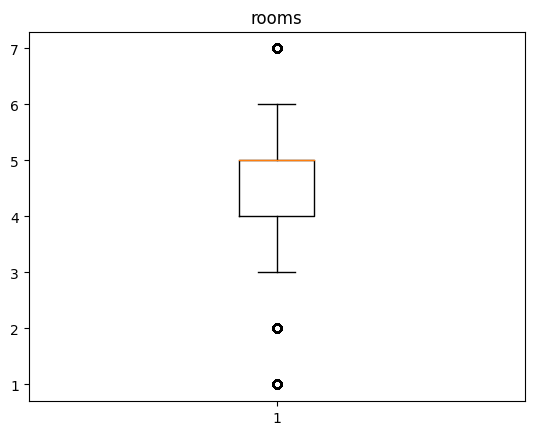

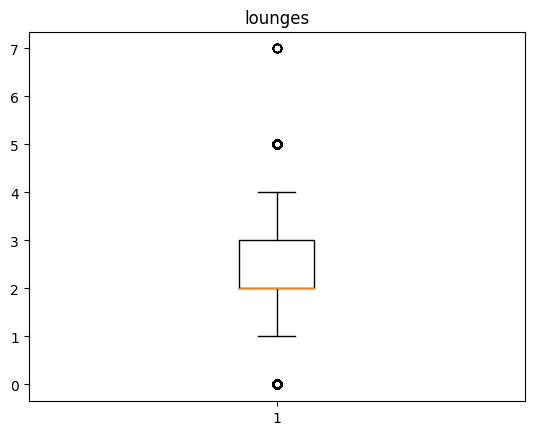

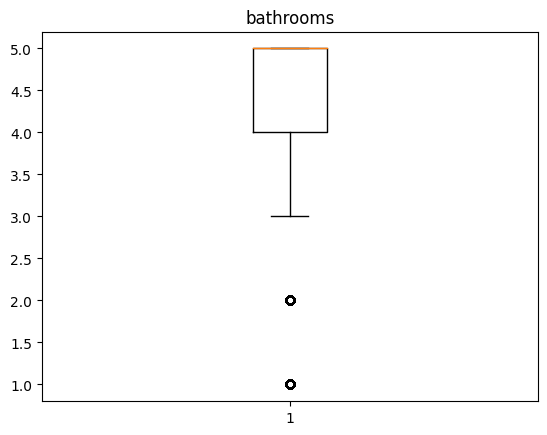

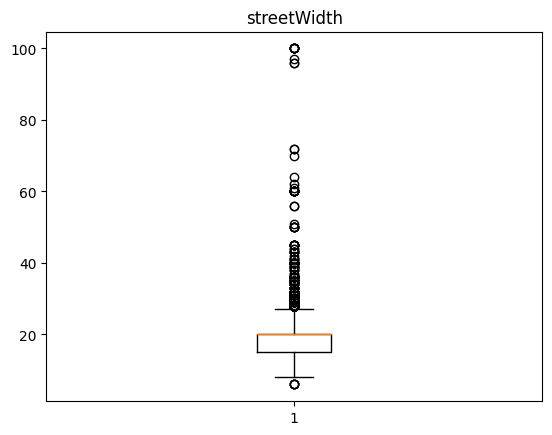

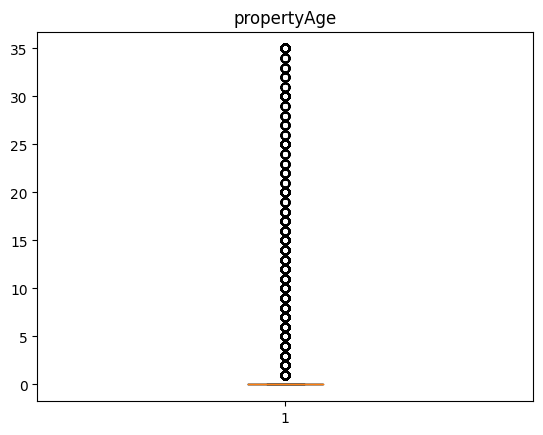

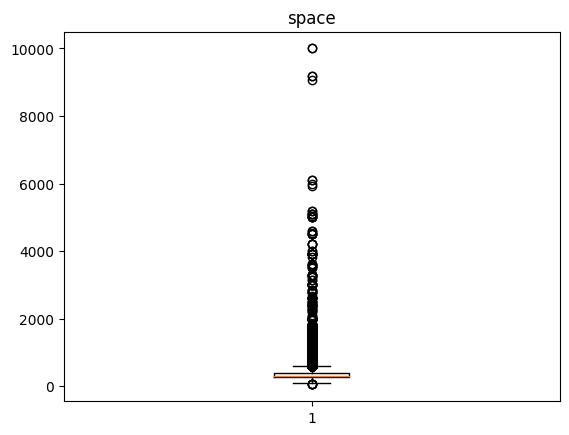

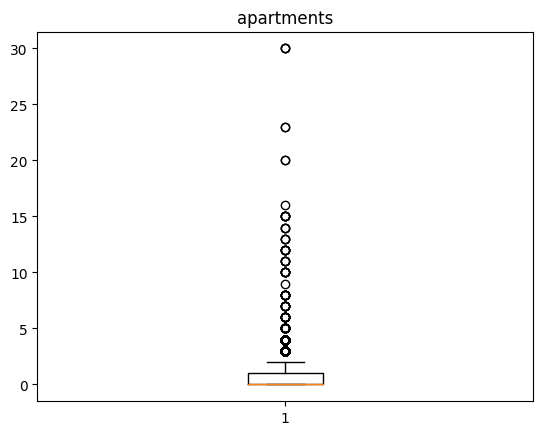

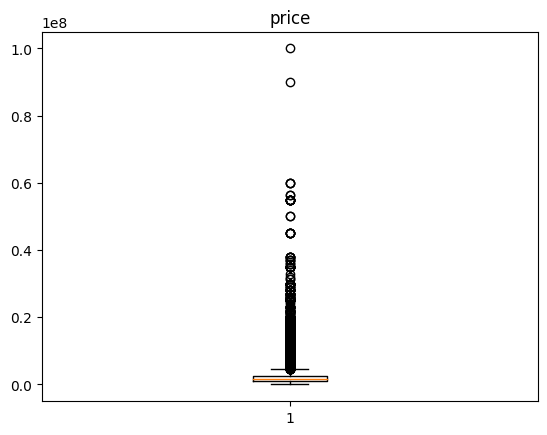

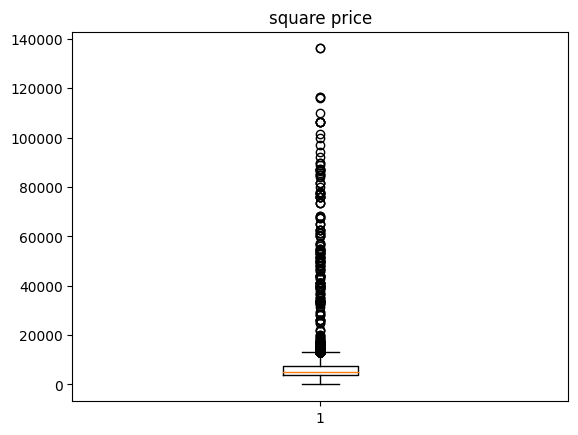

In [99]:
# list of numerical values
num_list = ['rooms', 'lounges', 'bathrooms', 'streetWidth', 'propertyAge', 'space', 'apartments', 'price', 'square price']

for c in num_list:
    plt.boxplot(df[c])
    plt.title(c)
    plt.show()

In [75]:
# here we can see that almost all columns have outliers (some are naturals like property age)

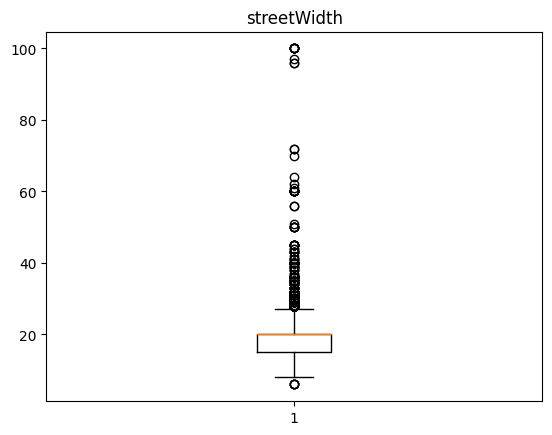

In [98]:
# here we will deal with street width
df = df.drop(df[df["streetWidth"] <= 5].index, axis=0)
plt.boxplot(df["streetWidth"])
plt.title("streetWidth")
plt.show()

In [ ]:
# DK: the outliers here are natural

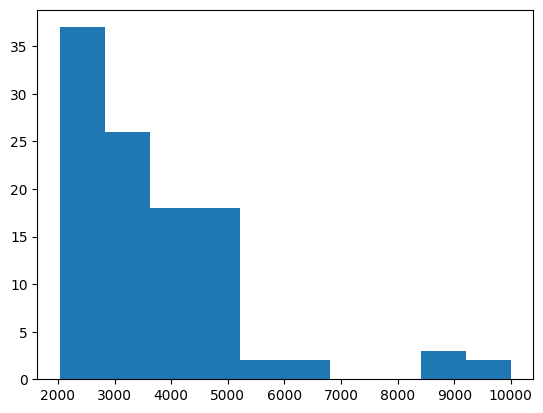

In [118]:
# here it looks like there is a issue with the space since villas space is not that big
plt.hist(df[df["space"]>2000]["space"])
plt.show()

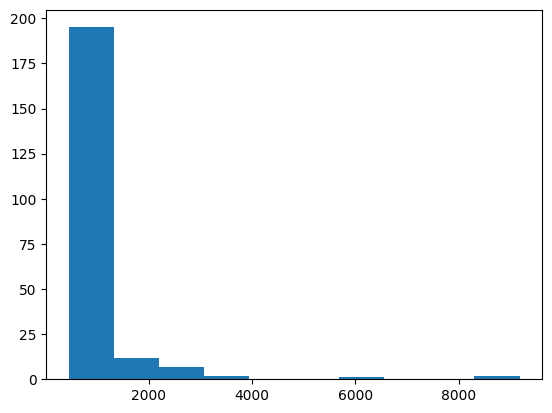

In [125]:
# DK: duplex space is 450 maximum
plt.hist(df[(df["space"]>450)&(df["duplex"] == 1)]["space"])
plt.show()

In [127]:
# the issue here is more clear we need to drop the outliers for duplex villas
df = df.drop(df[(df["space"]>450)&(df["duplex"] == 1)].index, axis=0)

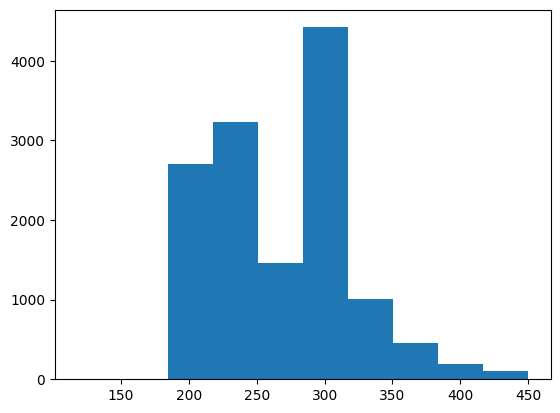

In [131]:
plt.hist(df[(df["duplex"] == 1)]["space"])
plt.show()

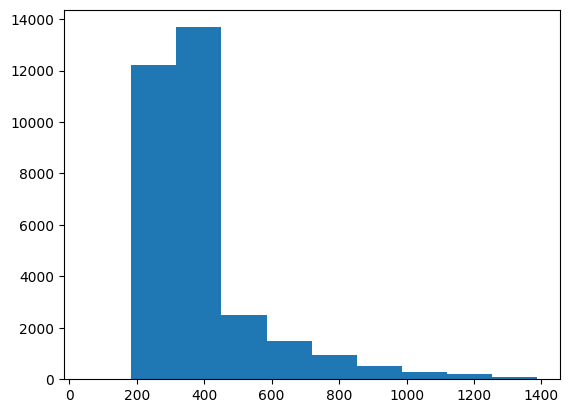

32008

In [147]:
plt.hist(df[(df["duplex"] == 0) & (df["space"] < 1400)]["space"])
plt.show()

# df[(df["duplex"] == 0)]["space"].value_counts()
df[(df["duplex"] == 0) & (df["space"] < 1400)]["space"].count()

In [150]:
df = df.drop(df[(df["duplex"] == 0) & (df["space"] > 1400)]["space"].index, axis=0)
df

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,0,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,غربية,7,3,5,15.0,1,3,0,1,1,...,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,3,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,جنوبية,5,2,5,20.0,1,0,0,1,1,...,1,1,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,غربية,7,2,5,12.0,1,0,0,1,1,...,0,1,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,غربية,5,3,5,20.0,0,0,0,1,1,...,0,1,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000
46824,جنوبية غربية,1,0,1,15.0,0,0,0,0,0,...,2,0,0,0,0,0,النهضة,شرق الرياض,2300000.0,5679.012346


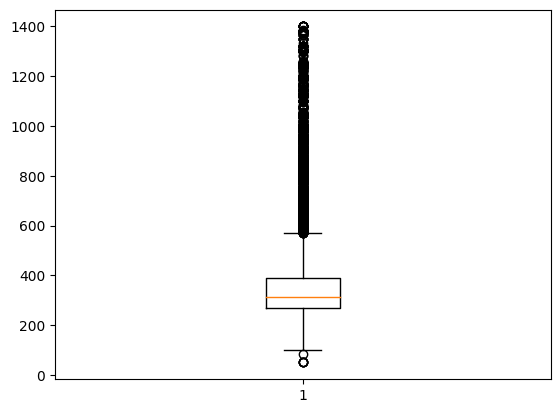

In [152]:
plt.boxplot(df["space"])
plt.show()

In [123]:
d = dtale.show(df, host="localhost")

In [124]:
d.open_browser()

# we will stop here after checking the outliers in d-tale. we found many bad data entries and mistakes thus we will drop the dataset.

In [153]:
d.kill()

2024-05-17 19:15:36,543 - INFO     - Executing shutdown...
2024-05-17 19:15:36,545 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
